In [1]:
!pip install scipy noisereduce speechrecognition jiwer sounddevice

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.0 MB/s eta 0:00:00


In [2]:
!pip install pydub
!apt install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
from google.colab import files

uploaded = files.upload()


Saving my_noisy_audio.mpeg to my_noisy_audio.mpeg


In [4]:
from google.colab import files

uploaded = files.upload()


Saving my_clean_audio.mpeg to my_clean_audio.mpeg


In [6]:
from pydub import AudioSegment


input_file = "my_noisy_audio.mpeg"
output_file = "my_noisy_audio.wav"

# Load and convert
audio = AudioSegment.from_file(input_file)
audio.export(output_file, format="wav")

print("Conversion successful! Saved as", output_file)


Conversion successful! Saved as my_noisy_audio.wav


In [7]:
from pydub import AudioSegment


input_file = "my_clean_audio.mpeg"
output_file = "my_clean_audio.wav"

# Load and convert
audio = AudioSegment.from_file(input_file)
audio.export(output_file, format="wav")

print("Conversion successful! Saved as", output_file)


Conversion successful! Saved as my_clean_audio.wav


In [8]:
files.download("my_clean_audio.wav")
files.download("my_noisy_audio.wav")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
pip install librosa matplotlib numpy

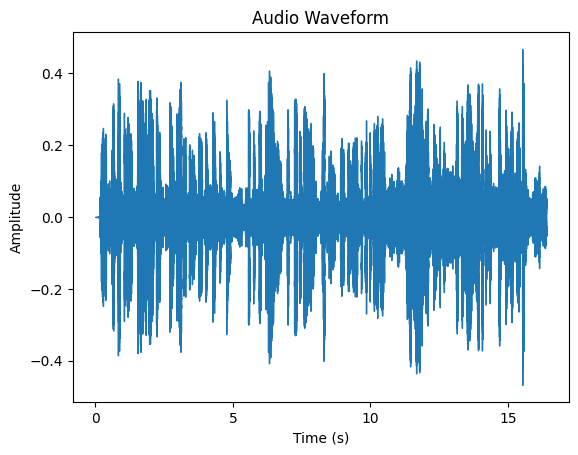

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load and resample audio
y, sr = librosa.load('my_noisy_audio.wav', sr=16000)

# Plot the waveform
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


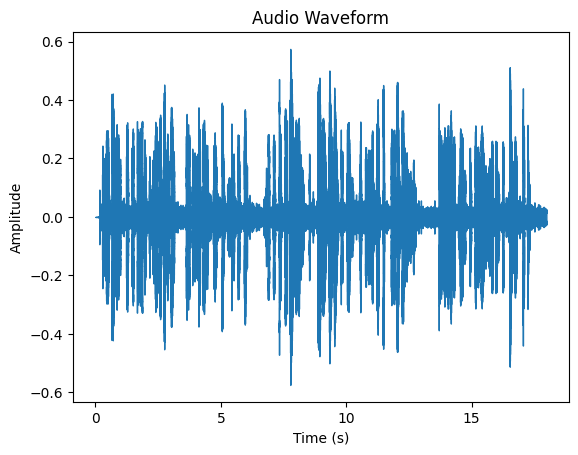

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load and resample audio
y, sr = librosa.load('my_clean_audio.wav', sr=16000)

# Plot the waveform
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [12]:
!pip install noisereduce librosa soundfile


In [24]:
import librosa
import noisereduce as nr
import soundfile as sf

# Load the noisy audio
y, sr = librosa.load("my_noisy_audio.wav", sr=None)

# Extract noise profile (first 0.5 sec)
noise_clip = y[0:int(sr * 0.5)]

# Reduce noise using noise_clip
cleaned = nr.reduce_noise(y=y, y_noise=noise_clip, sr=sr)

# Save cleaned file
sf.write("my_cleaned_audio.wav", cleaned, sr)

print("Noise reduction complete.")


Noise reduction complete.


In [14]:
!pip install -U openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.2/803.2 kB 11.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20250625-py3-none-any.whl size=803979 sha256=a2e62f4b3338fdc03eb16d3a34e60648a3fcf2049a16bc836f6b9b75544ace7b
  Stored in directory: /root/.cache/pip/wheels/61/d2/20/09ec9bef734d126cba375b15898010b6cc28578d8afdde5869
Successfully built openai-whisper


In [25]:
import whisper

# Load Whisper model (use "small" for better accuracy)
model = whisper.load_model("small")

result_clean = model.transcribe("my_clean_audio.wav")
clean_text = result_clean["text"]

# Transcribe noisy
result_noisy = model.transcribe("my_noisy_audio.wav")
noisy_text = result_noisy["text"]

# Transcribe cleaned
result_cleaned = model.transcribe("my_cleaned_audio.wav")
cleaned_text = result_cleaned["text"]



# Print both
print("/n Transcription (clean Audio):")
print(clean_text)

print("\n Transcription (Noisy Audio):")
print(noisy_text)

print("\n Transcription (Cleaned Audio):")
print(cleaned_text)


/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.12/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


/n Transcription (clean Audio):
 She turned golden as the sun dipped below the horizon, painting the clouds in soft shades of pink. She picked up the old diary, it spaces her load with time, and smiled at the forgotten memories. In the middle of the chaos, a calm mind becomes the strongest weapon.

 Transcription (Noisy Audio):
 As the sun dipped below the horizon, painting the clouds in soft shades of pink, she picked up the old daddy, with his pages yellowed with time and smiled at the forgotten memories. In the middle of the chaos, a calm mind becomes the strongest weapon.

 Transcription (Cleaned Audio):
 Then, as the sun dipped below the horizon, painting the clouds in soft shades of pink, she picked up the old hat which pages yellow with time and smiled at the forgotten memories. In the middle of chaos, a calm mind becomes the strongest weapon.


In [16]:
!pip install jiwer


In [22]:
from jiwer import wer

# Ground truth / reference transcription (from clean audio)
reference = """She turned golden as the sun dipped below the horizon, painting the clouds in soft shades of pink. She picked up the old diary, it spaces her load with time, and smiled at the forgotten memories. In the middle of the chaos, a calm mind becomes the strongest weapon.
"""

# Noisy transcription
noisy = """As the sun dipped below the horizon, painting the clouds in soft shades of pink, she picked up the old daddy, with his pages yellowed with time and smiled at the forgotten memories. In the middle of the chaos, a calm mind becomes the strongest weapon."""

# Cleaned transcription
cleaned = """Then, as the sun dipped below the horizon, painting the clouds in soft shades of pink, she picked up the old hat which pages yellow with time and smiled at the forgotten memories. In the middle of chaos, a calm mind becomes the strongest weapon."""


In [23]:
# Calculate WER for both
noisy_wer = wer(reference, noisy)
cleaned_wer = wer(reference, cleaned)

# Print as percentages
print(f"WER for Noisy Audio: {noisy_wer * 100:.2f}%")
print(f"WER for Cleaned Audio: {cleaned_wer * 100:.2f}%")


WER for Noisy Audio: 24.49%
WER for Cleaned Audio: 24.49%
